# Tabular models

In [1]:
from fastai import *
from fastai.tabular import *

Tabular data should be in a Pandas `DataFrame`.

In [20]:
import os
import re
from collections import Counter
import random

In [3]:
path = os.getcwd()
os.listdir()

['bch_data_breakdown.xlsx',
 'first_model.pth',
 'BCH ED visits FY1819_with additions.xlsx',
 'sample_cleaned.xlsx',
 'models',
 'ED_triage_notebook.ipynb',
 'EGH ED visits FY1819_with additions.xlsx',
 '.ipynb_checkpoints',
 'lesson4-tabular.ipynb',
 'ed_databunch',
 'jj_modified_bch_data.xlsx',
 'screen_question_parsing.ipynb']

In [4]:
#df = pd.read_excel('jj_modified_bch_data.xlsx', nrows = 1000)
df = pd.read_excel('jj_modified_bch_data.xlsx')

In [5]:
len(df)

136993

In [6]:
df.head()

,Unnamed: 0,ID,ChartNumber,EncounterNumber,TriageLevel,AgeNumber,AgeInYrs,GenderDesc,Triage Date & Time,Reg Date & Time,...,Are you feeling feverish or have had shakes or chills in the last 24 hours?,Have you ever been isolated/required isolation for an infectious disease when receiving care in a healthcare setting?,Do you have a new Rash?,Do you have a new onset of Vomiting/Diarrhea in the last 24 hours?,Have you travelled outside of Canada/USA in the last 3 weeks?,Have you had contact with a sick person who has travelled outside of Canada/USA in the last 3 weeks?,Have you received Health Care in another country in the last 2 years?,Do you have a new/worse cough or shortness of breath?,"If so, select all countries that apply","If so, select all infectious diseases that apply"
0,0,1,N675533,NE000001/18,3.0,12,12.0,Male,31/03/2018 11:55:00PM,01/04/2018 12:03:00AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,N798153,NE000002/18,2.0,80,80.0,Female,31/03/2018 11:22:00PM,01/04/2018 12:08:00AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3,N783129,NE000003/18,3.0,3,3.0,Male,01/04/2018 12:01:00AM,01/04/2018 12:10:00AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4,N299709,NE000004/18,3.0,56,56.0,Female,01/04/2018 12:04:00AM,01/04/2018 12:13:00AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5,N17059,NE000005/18,2.0,69,69.0,Female,01/04/2018 12:11:00AM,01/04/2018 12:14:00AM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
list(df.columns)

['Unnamed: 0',
 'ID',
 'ChartNumber',
 'EncounterNumber',
 'TriageLevel',
 'AgeNumber',
 'AgeInYrs',
 'GenderDesc',
 'Triage Date & Time',
 'Reg Date & Time',
 'PIA Date & Time',
 'Disposition Date & Time',
 'DischargeDisposition',
 'DischargeDispositionDesc',
 'Left ED Date & Time',
 'PresentingComplaint',
 'PresentingComplaintDesc',
 'MainDiagnosisCode',
 'MainDiagnosisCodeDesc',
 'AdmitLocation',
 'PatientService',
 'SubjectiveNotes',
 'InfectionControlScreening',
 'MedicalHistory',
 'BloodPressure_LastEDReading',
 'O2Saturation_LastEDReading',
 'Pulse_LastEDReading',
 'Temperature_LastEDReading',
 'Are you feeling feverish or have had shakes or chills in the last 24 hours?',
 'Have you ever been isolated/required isolation for an infectious disease when receiving care in a healthcare setting?',
 'Do you have a new Rash?',
 'Do you have a new onset of Vomiting/Diarrhea in the last 24 hours?',
 'Have you travelled outside of Canada/USA in the last 3 weeks?',
 'Have you had contact wi

In [8]:
df['outcome'] = df['AdmitLocation'].astype('str').map(
{'N.CC CCU': 'ICU',
 'N.CC ICU': 'ICU',
 'N.ER IN' : 'madmit',
 'N.ERMH IN': 'madmit',
 'N.MAU': 'madmit',
 'N.MED CARD': 'madmit',
 'N.MED CPU': 'madmit',
 'N.MED CT': 'madmit',
 'N.MED GER': 'madmit',
 'N.MED NEUR': 'madmit',
 'N.MED ONC': 'madmit',
 'N.MED RESP': 'madmit',
 'N.MED SIM': 'madmit',
 'N.MED SIX': 'madmit',
 'N.MH CHAD': 'madmit',
 'N.MH CHADI': 'madmit',
 'N.MH GENB': 'madmit',
 'N.MH GER': 'madmit',
 'N.MH INTEN': 'madmit',
 'N.SIMCU': 'ICU',
 'N.SUR GEN': 'sadmit',
 'N.SUR ORTH': 'sadmit',
 'N.SUR SS': 'sadmit',
 'N.WC PAED': 'madmit',
 'nan': 'discharge'})

In [10]:
#check that I got what I wanted out of the prior setp
count = Counter(df['outcome']); count

Counter({'discharge': 120106,
         'sadmit': 2267,
         'madmit': 12976,
         'ICU': 1340,
         nan: 304})

In [11]:
df.dropna(subset = ['outcome'], inplace = True); len(df)

136689

In [12]:
add_datepart(df, 'Triage Date & Time', time = True) # inplace
df.head()

,Unnamed: 0,ID,ChartNumber,EncounterNumber,TriageLevel,AgeNumber,AgeInYrs,GenderDesc,Reg Date & Time,PIA Date & Time,...,Triage Date & TimeIs_month_end,Triage Date & TimeIs_month_start,Triage Date & TimeIs_quarter_end,Triage Date & TimeIs_quarter_start,Triage Date & TimeIs_year_end,Triage Date & TimeIs_year_start,Triage Date & TimeHour,Triage Date & TimeMinute,Triage Date & TimeSecond,Triage Date & TimeElapsed
0,0,1,N675533,NE000001/18,3.0,12,12.0,Male,01/04/2018 12:03:00AM,01/04/2018 1:36:00AM,...,True,False,True,False,False,False,23.0,55.0,0.0,1522540500
1,1,2,N798153,NE000002/18,2.0,80,80.0,Female,01/04/2018 12:08:00AM,01/04/2018 1:10:00AM,...,True,False,True,False,False,False,23.0,22.0,0.0,1522538520
2,2,3,N783129,NE000003/18,3.0,3,3.0,Male,01/04/2018 12:10:00AM,01/04/2018 1:49:00AM,...,False,False,False,False,False,False,0.0,1.0,0.0,1515024060
3,3,4,N299709,NE000004/18,3.0,56,56.0,Female,01/04/2018 12:13:00AM,NaN,...,False,False,False,False,False,False,0.0,4.0,0.0,1515024240
4,4,5,N17059,NE000005/18,2.0,69,69.0,Female,01/04/2018 12:14:00AM,01/04/2018 1:40:00AM,...,False,False,False,False,False,False,0.0,11.0,0.0,1515024660


In [14]:
o2sat = [item if item[-1] != '%' else item[:-1] for item in df['O2Saturation_LastEDReading'].astype('str')]
o2sat = [np.nan if item == 'nan' else float(item) for item in o2sat] 
df['o2sat'] = o2sat

In [15]:
pulse = df['Pulse_LastEDReading']
pulse = [re.sub("[^0-9]", "", str(item)) for item in pulse]
pulse = [np.nan if item == '' else float(item) for item in pulse] 
#set(pulse)
df['pulse'] = pulse

In [16]:
temp = df['Temperature_LastEDReading']
temp = [re.sub("[^0-9]", "", str(item)) for item in temp]
temp = [np.nan if item == '' else float(item) for item in temp] 
temp = [item/10 if item > 100 else item for item in temp]
temp = [np.nan if item > 40  else item for item in temp]
#set(temp)
df['temp'] = temp

In [17]:
df.columns

Index(['Unnamed: 0', 'ID', 'ChartNumber', 'EncounterNumber', 'TriageLevel',
       'AgeNumber', 'AgeInYrs', 'GenderDesc', 'Reg Date & Time',
       'PIA Date & Time', 'Disposition Date & Time', 'DischargeDisposition',
       'DischargeDispositionDesc', 'Left ED Date & Time',
       'PresentingComplaint', 'PresentingComplaintDesc', 'MainDiagnosisCode',
       'MainDiagnosisCodeDesc', 'AdmitLocation', 'PatientService',
       'SubjectiveNotes', 'InfectionControlScreening', 'MedicalHistory',
       'BloodPressure_LastEDReading', 'O2Saturation_LastEDReading',
       'Pulse_LastEDReading', 'Temperature_LastEDReading',
       'Are you feeling feverish or have had shakes or chills in the last 24 hours?',
       'Have you ever been isolated/required isolation for an infectious disease when receiving care in a healthcare setting?',
       'Do you have a new Rash?',
       'Do you have a new onset of Vomiting/Diarrhea in the last 24 hours?',
       'Have you travelled outside of Canada/USA in th

In [19]:
dep_var = 'outcome'
cat_names = ['TriageLevel', 'GenderDesc', 'PresentingComplaint', 'MainDiagnosisCodeDesc','Are you feeling feverish or have had shakes or chills in the last 24 hours?',
       'Have you ever been isolated/required isolation for an infectious disease when receiving care in a healthcare setting?',
       'Do you have a new Rash?',
       'Do you have a new onset of Vomiting/Diarrhea in the last 24 hours?',
       'Have you travelled outside of Canada/USA in the last 3 weeks?',
       'Have you had contact with a sick person who has travelled outside of Canada/USA in the last 3 weeks?',
       'Have you received Health Care in another country in the last 2 years?',
       'Do you have a new/worse cough or shortness of breath?',
        'Triage Date & TimeYear', 'Triage Date & TimeMonth',
       'Triage Date & TimeWeek', 'Triage Date & TimeDay',
       'Triage Date & TimeDayofweek', 'Triage Date & TimeDayofyear',
       'Triage Date & TimeIs_month_end', 'Triage Date & TimeIs_month_start',
       'Triage Date & TimeIs_quarter_end',
       'Triage Date & TimeIs_quarter_start', 'Triage Date & TimeIs_year_end',
       'Triage Date & TimeIs_year_start', 'Triage Date & TimeHour',
       'Triage Date & TimeMinute', 'Triage Date & TimeSecond',
       'Triage Date & TimeElapsed']
cont_names = ['AgeInYrs', 'o2sat', 'pulse','temp']
procs = [FillMissing, Categorify, Normalize]

In [21]:
test = TabularList.from_df(df.copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [23]:
valid_idxs = random.sample(range(len(df)), len(df)//5); len(valid_idxs)

27337

In [24]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(valid_idxs)
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [30]:
len(data.train_ds), len(data.valid_ds)

(109352, 27337)

In [28]:
len(data.train_ds) +  len(data.valid_ds) == len(data.test_ds)

True

In [29]:
data.save(os.getcwd() + '/ed_databunch')

In [31]:
data.show_batch(rows=10)

TriageLevel,GenderDesc,PresentingComplaint,MainDiagnosisCodeDesc,Are you feeling feverish or have had shakes or chills in the last 24 hours?,Have you ever been isolated/required isolation for an infectious disease when receiving care in a healthcare setting?,Do you have a new Rash?,Do you have a new onset of Vomiting/Diarrhea in the last 24 hours?,Have you travelled outside of Canada/USA in the last 3 weeks?,Have you had contact with a sick person who has travelled outside of Canada/USA in the last 3 weeks?,Have you received Health Care in another country in the last 2 years?,Do you have a new/worse cough or shortness of breath?,Triage Date & TimeYear,Triage Date & TimeMonth,Triage Date & TimeWeek,Triage Date & TimeDay,Triage Date & TimeDayofweek,Triage Date & TimeDayofyear,Triage Date & TimeIs_month_end,Triage Date & TimeIs_month_start,Triage Date & TimeIs_quarter_end,Triage Date & TimeIs_quarter_start,Triage Date & TimeIs_year_end,Triage Date & TimeIs_year_start,Triage Date & TimeHour,Triage Date & TimeMinute,Triage Date & TimeSecond,Triage Date & TimeElapsed,o2sat_na,pulse_na,temp_na,AgeInYrs,o2sat,pulse,temp,target
4.0,Female,651,"Viral infection, unspecified",#na#,#na#,N,N,N,N,#na#,Y,2018.0,4.0,17.0,27.0,4.0,117.0,False,False,False,False,False,False,20.0,51.0,0.0,1524862260,False,False,False,0.9428,0.3034,-0.0117,0.1561,discharge
3.0,Female,999,Other and unspecified intestinal obstruction,N,#na#,N,N,N,N,#na#,N,2018.0,8.0,32.0,12.0,6.0,224.0,False,False,False,False,False,False,12.0,20.0,0.0,1534076400,False,False,False,0.4030,-0.5399,-0.9060,-0.7847,sadmit
2.0,Male,401,Nausea with vomiting,N,N,N,N,N,N,N,N,2018.0,7.0,27.0,7.0,5.0,188.0,False,False,False,False,False,False,0.0,59.0,0.0,1530925140,False,False,True,-1.5069,-0.2588,2.1832,-0.2202,discharge
3.0,Male,852,"Otitis media, unspecified",N,#na#,N,Y,N,N,#na#,Y,2018.0,6.0,24.0,11.0,0.0,162.0,False,False,False,False,False,False,21.0,54.0,0.0,1528754040,False,False,False,-1.6697,0.0223,2.4678,-0.4084,discharge
3.0,Female,457,"Mild hyperemesis gravidarum, antepartum condition or complication",N,N,N,Y,N,N,N,N,2019.0,10.0,40.0,1.0,1.0,274.0,False,True,False,True,False,False,20.0,28.0,0.0,1569961680,False,False,False,-0.6350,-0.2588,0.0289,0.5325,madmit
2.0,Male,6,Benign hypertension,N,#na#,N,N,N,#na#,#na#,N,2019.0,6.0,23.0,3.0,0.0,154.0,False,False,False,False,False,False,10.0,20.0,0.0,1559557200,False,False,False,0.2369,-0.2588,0.7199,0.5325,discharge
3.0,Female,852,Other specified respiratory disorders,N,#na#,N,N,N,N,#na#,Y,2018.0,1.0,1.0,7.0,6.0,7.0,False,False,False,False,False,False,13.0,35.0,0.0,1515332100,False,False,False,1.7732,0.0223,-0.7027,-0.4084,madmit
3.0,Male,258,Anal abscess,N,#na#,N,N,N,N,#na#,N,2018.0,6.0,23.0,7.0,3.0,158.0,False,False,False,False,False,False,13.0,44.0,0.0,1528379040,False,False,False,0.4030,0.3034,-0.3369,-0.0320,discharge
2.0,Female,3,Other chest pain,Y,#na#,N,N,N,N,#na#,Y,2018.0,11.0,45.0,10.0,5.0,314.0,False,False,False,False,False,False,7.0,55.0,0.0,1541836500,False,False,False,-0.6350,0.3034,0.5573,-0.7847,discharge
2.0,Female,8,Syncope and collapse,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2018.0,3.0,10.0,9.0,4.0,68.0,False,False,False,False,False,False,11.0,14.0,0.0,1520594040,False,False,False,-1.2578,-0.2588,0.3947,0.3443,discharge


In [32]:
f1 = FBeta(beta=1, average = 'macro')

In [33]:
learn = tabular_learner(data, layers=[200,100], metrics=[accuracy,f1])

In [34]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


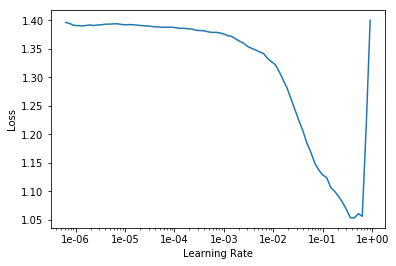

In [35]:
learn.recorder.plot()

In [36]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.289823,0.272783,0.906683,0.506220,33:57
1,0.148484,0.332750,0.902733,0.491771,1:23:18
2,0.146234,0.335858,0.905732,0.500244,1:22:31
3,0.056214,0.433029,0.902184,0.563227,1:13:58
4,0.015573,0.561721,0.902769,0.560735,1:02:23


In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.save(os.getcwd() + '/first_model')

## Inference

In [ ]:
row = df.iloc[0]

In [ ]:
row

In [ ]:
learn.predict(row)

In [ ]:
ltd_df = df.sample(n=10000)

In [ ]:
len(ltd_df)

In [ ]:
add_datepart(ltd_df, 'Triage Date & Time', time = True) # inplace
ltd_df.head()

In [ ]:
ltd_df.head()

In [ ]:
ltd_df.columns

In [ ]:
dep_var = 'outcome'
cat_names = ['TriageLevel', 'Triage Date & TimeYear', 'Triage Date & TimeMonth',
       'Triage Date & TimeWeek', 'Triage Date & TimeDay',
       'Triage Date & TimeDayofweek', 'Triage Date & TimeDayofyear',
       'Triage Date & TimeIs_month_end', 'Triage Date & TimeIs_month_start',
       'Triage Date & TimeIs_quarter_end',
       'Triage Date & TimeIs_quarter_start', 'Triage Date & TimeIs_year_end',
       'Triage Date & TimeIs_year_start',
       'Triage Date & TimeMinute', 'Triage Date & TimeSecond',
       'Triage Date & TimeElapsed','GenderDesc', 'PresentingComplaintDesc', 'MainDiagnosisCodeDesc','Are you feeling feverish or have had shakes or chills in the last 24 hours?',
       'Have you ever been isolated/required isolation for an infectious disease when receiving care in a healthcare setting?',
       'Do you have a new Rash?',
       'Do you have a new onset of Vomiting/Diarrhea in the last 24 hours?',
       'Have you travelled outside of Canada/USA in the last 3 weeks?',
       'Have you had contact with a sick person who has travelled outside of Canada/USA in the last 3 weeks?',
       'Have you received Health Care in another country in the last 2 years?',
       'Do you have a new/worse cough or shortness of breath?']
cont_names = ['AgeInYrs', 'o2sat', 'pulse','temp']
procs = [FillMissing, Categorify, Normalize]

In [ ]:
test = TabularList.from_df(ltd_df.copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [ ]:
data = (TabularList.from_df(ltd_df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           #.split_by_idx(valid_idxs)
                           .split_by_rand_pct()
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch())

In [ ]:
f1 = FBeta(beta=1, average = 'macro')

In [ ]:
learn = tabular_learner(data, layers=[200,200,100], metrics=[accuracy,f1])

In [ ]:
learn.fit_one_cycle(10, 1e-3)